In [59]:
import matplotlib.pyplot as plt

In [60]:
def print_tsp_sample(file_path, num_lines=10):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i >= num_lines:
                break
            print(line.strip())

file_path = 'zi929.tsp'
print_tsp_sample(file_path, num_lines=15)       

NAME : zi929
COMMENT : 929 locations in Zimbabwe
COMMENT : Derived from National Imagery and Mapping Agency data
TYPE : TSP
DIMENSION : 929
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 15700.0000 30316.6667
2 16033.3333 28850.0000
3 16200.0000 31583.3333
4 16233.3333 31533.3333
5 16250.0000 31516.6667
6 16300.0000 29250.0000
7 16500.0000 29933.3333
8 16516.6667 28800.0000


In [61]:
def read_tsp_file(file_path):
    nodes = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        start_reading = False
        for line in lines:
            if "NODE_COORD_SECTION" in line:
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                node_id, x, y = int(parts[0]), float(parts[1]), float(parts[2])
                nodes.append((x, y))
    return nodes

In [ ]:
def plot_tsp(nodes, show_path=False):
    x_coords, y_coords = zip(*nodes)
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("TSP Tour Visualization")
    plt.legend()
    plt.show()

In [63]:
file_path = 'zi929.tsp'
nodes = read_tsp_file(file_path)

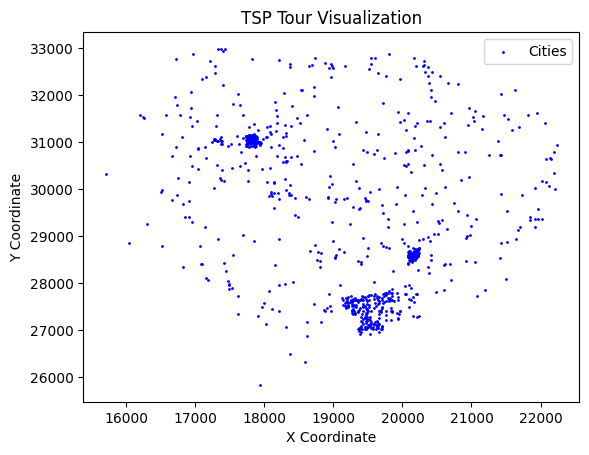

In [64]:
plot_tsp(nodes, show_path=True)

In [66]:
def euclidean(x1,x2,y1,y2):
    distance = (((x1-x2)**2)+((y1-y2)**2))**0.5
    return distance

In [172]:
class graph():
    def __init__(self,size):
        self.size = size
        self.box = [[0]* size for _ in range(size)]
    def parrent_nodes(self,u,v,weight):
        self.box[u][v] = weight
        self.box[v][u] = weight

In [ ]:
size = 929
K = 5  # Number of nearest cities to connect
my_graph = graph(size)

for num, (x1, y1) in enumerate(nodes):
    distances = []
    
    for idx, (x2, y2) in enumerate(nodes):
        distance = euclidean(x1, x2, y1, y2)
        distances.append((distance, idx))
    
    # Sort by distance (smallest first)
    distances.sort()
    
    # Connect to the K nearest neighbors (skip distance to itself at index 0)
    for k in range(1, K + 1):
        neighbor_idx = distances[k][1]
        neighbor_dist = distances[k][0]
        my_graph.parrent_nodes(num, neighbor_idx, neighbor_dist)


In [176]:
def make_edges():
    edges = []
    for i in range(0,size):
        for k,j in enumerate(my_graph.box[i]):
            if(j!= 0):
                edges.append((i,k))
    return edges
edges = make_edges()

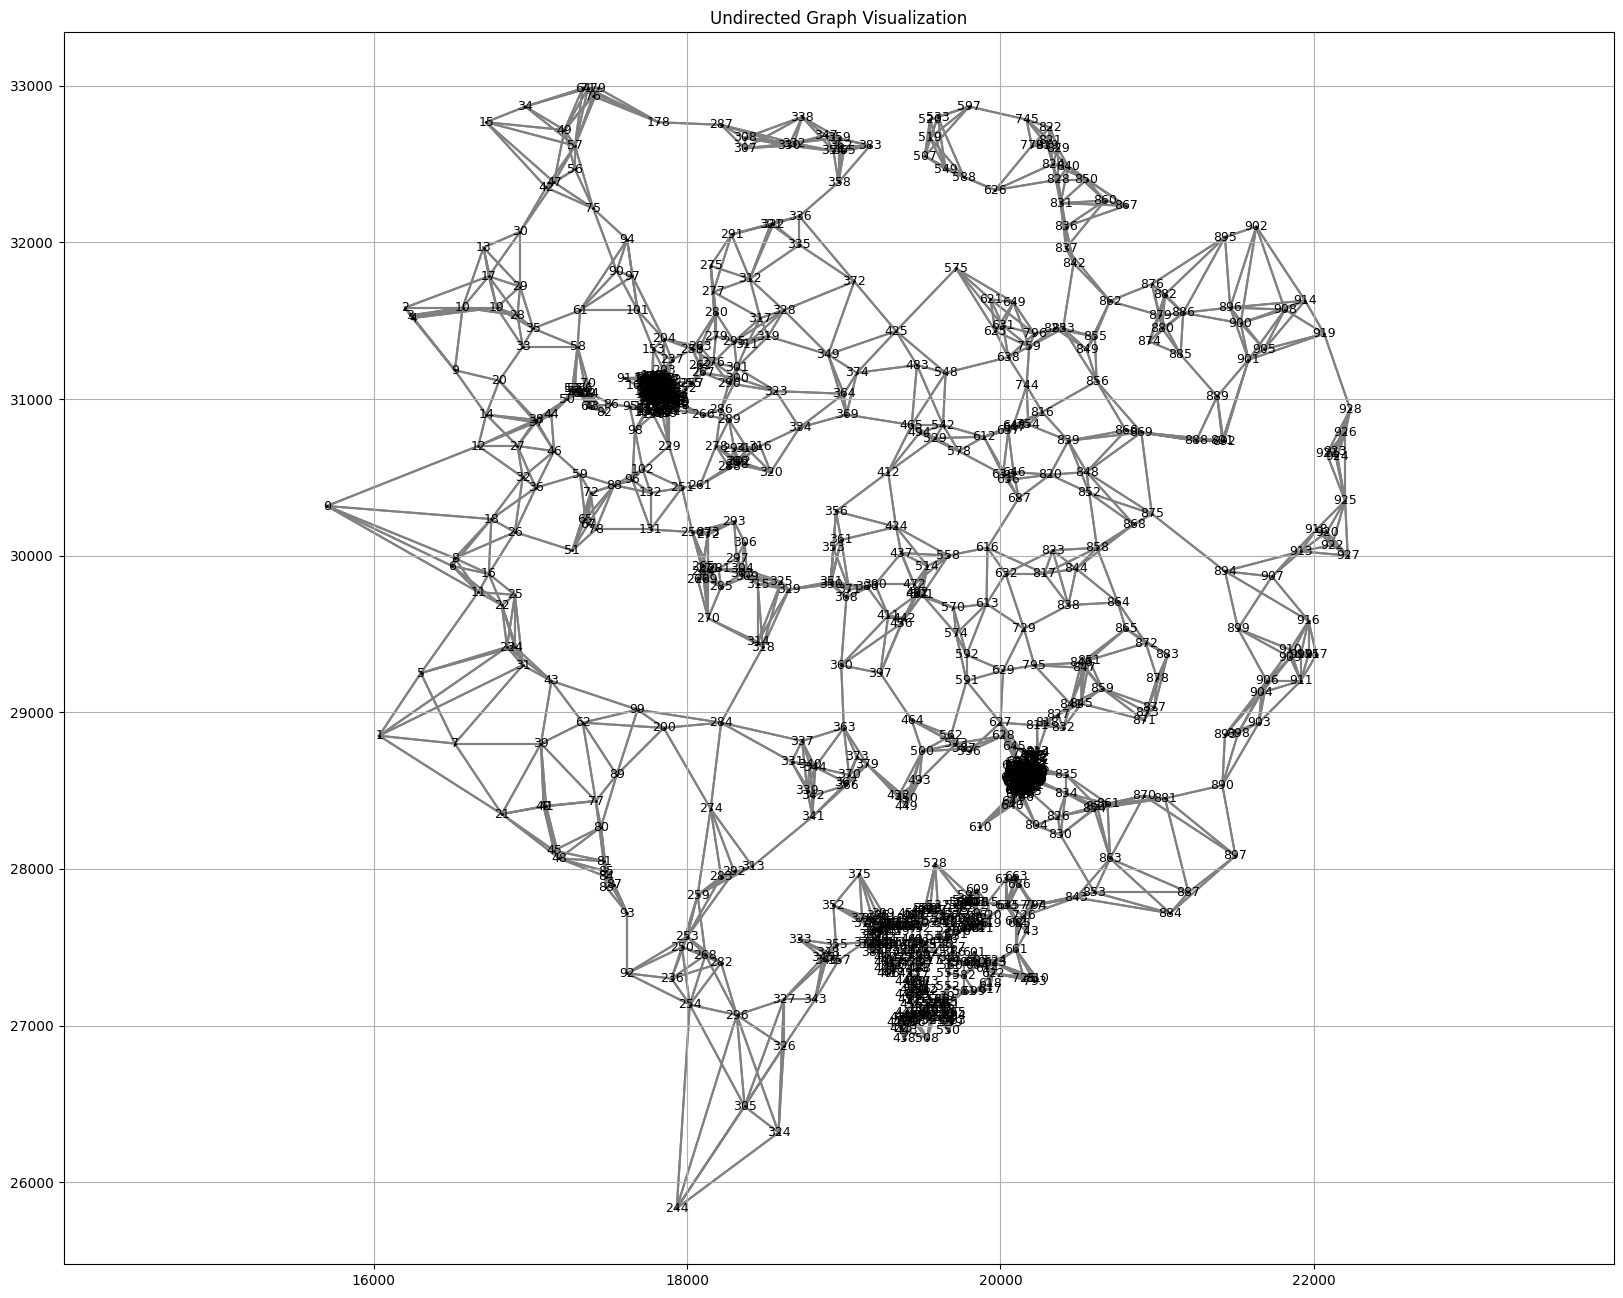

In [ ]:
def visualize_graph_matplotlib(nodes, edges):
    plt.figure(figsize=(20, 16))
    # Draw edges
    for edge in edges:
        i, j = edge
        x_values = [nodes[i][0], nodes[j][0]]
        y_values = [nodes[i][1], nodes[j][1]]
        plt.plot(x_values, y_values, color='gray', zorder=1)

    # Draw nodes
    x_coords = [node[0] for node in nodes]
    y_coords = [node[1] for node in nodes]
    plt.scatter(x_coords, y_coords, color='blue', label='Cities',s = 1,zorder=2,edgecolors='black')
    #plt.scatter(x_coords, y_coords, color='skyblue', s=100, zorder=2, edgecolors='black')

    # Add labels
    for idx, (x, y) in enumerate(nodes):
        plt.text(x, y, str(idx), fontsize=9, ha='center', va='center', zorder=3, color='black')

    plt.title("Undirected Graph Visualization")
    plt.axis('equal')  # Keep aspect ratio square
    plt.grid(True)
    plt.show()

    
visualize_graph_matplotlib(nodes, edges)

